## Name: Saad Ahmed
## Roll_No: 19I-1705
## Section: DS-N
## Fundamentals of Data Science (Semester Project)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# a. Data Reading:

In [2]:
df = pd.read_csv('Blood_Pressure_data.csv')

In [3]:
pd.set_option('display.max_columns',None)

# b. Data Cleaning:

In [4]:
df.head(3)

,id,patient_no,cast,gender,age group,weight,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,Med,label
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>5
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO


In [5]:
df.drop(['id','patient_no','weight','medical_specialty'],axis=1,inplace = True)

In [6]:
df.head(2)

,cast,gender,age group,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,Med,label
0,Caucasian,Female,[0-10),6,25,1,1,?,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>5


##       1. Handling Missing Values:

In [7]:
df['cast'].value_counts()

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: cast, dtype: int64

In [8]:
df = df[df['cast']!='?']

In [9]:
df.head()

,cast,gender,age group,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,Med,label
0,Caucasian,Female,[0-10),6,25,1,1,?,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>5
2,AfricanAmerican,Female,[20-30),1,1,7,2,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [10]:
df['payer_code'].value_counts()

?     39712
MC    31605
HM     6128
SP     4763
BC     4541
MD     3434
CP     2463
UN     2284
CM     1919
OG     1025
PO      589
DM      534
CH      144
WC      125
OT       95
MP       77
SI       55
Name: payer_code, dtype: int64

In [11]:
# Since Most of the Values are missing. So, I am dropping this column.
df.drop('payer_code',axis=1,inplace=True)

In [12]:
df[df['diag_1']=='?'].describe()

,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,1.894737,5.736842,4.526316,4.105263,37.315789,0.578947,14.473684,0.157895,0.263158,0.947368,7.105263
std,1.328940,6.444999,4.194817,1.696229,20.586006,0.837708,5.881878,0.501460,0.561951,1.129094,1.629408
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000,4.000000
25%,1.000000,1.000000,1.000000,3.000000,25.500000,0.000000,11.000000,0.000000,0.000000,0.000000,6.000000
50%,1.000000,3.000000,4.000000,4.000000,38.000000,0.000000,14.000000,0.000000,0.000000,1.000000,8.000000
75%,3.000000,6.000000,7.000000,4.500000,51.000000,1.000000,19.000000,0.000000,0.000000,1.500000,8.000000
max,6.000000,25.000000,17.000000,8.000000,74.000000,2.000000,25.000000,2.000000,2.000000,3.000000,9.000000


In [13]:
df=df[df['diag_1']!='?']

In [14]:
df[df['diag_2']=='?'].describe()

,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000
mean,1.704478,2.638806,5.361194,2.847761,41.334328,0.429851,8.274627,0.101493,0.101493,0.397015,2.677612
std,1.235386,4.790614,3.251575,1.943233,16.527110,1.032556,5.508495,0.425776,0.662397,1.259927,2.445319
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,32.000000,0.000000,4.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,7.000000,2.000000,44.000000,0.000000,6.000000,0.000000,0.000000,0.000000,1.000000
75%,2.000000,1.000000,7.000000,3.000000,53.000000,0.000000,11.000000,0.000000,0.000000,0.000000,5.000000
max,6.000000,25.000000,17.000000,14.000000,75.000000,6.000000,29.000000,3.000000,9.000000,17.000000,9.000000


In [15]:
df=df[df['diag_2']!='?']

In [16]:
df[df['diag_3']=='?'].describe()

,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000
mean,2.258748,2.916206,5.400552,2.755064,36.894107,0.716390,10.044199,0.187845,0.129834,0.373849,2.337017
std,1.549875,5.340513,4.380388,1.959227,18.052581,1.170548,6.243439,0.725874,0.726518,1.272979,1.132125
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
25%,1.000000,1.000000,1.000000,1.000000,25.000000,0.000000,6.000000,0.000000,0.000000,0.000000,2.000000
50%,2.000000,1.000000,7.000000,2.000000,38.000000,0.000000,8.000000,0.000000,0.000000,0.000000,2.000000
75%,3.000000,1.000000,7.000000,3.000000,50.000000,1.000000,14.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,28.000000,17.000000,13.000000,79.000000,6.000000,48.000000,7.000000,14.000000,16.000000,9.000000


In [17]:
df=df[df['diag_3']!='?']

In [18]:
# Keeping Records of Columns for which I have to detect Outliers
outlier_detection=['number_outpatient','number_emergency','number_inpatient']

In [19]:
df[df['metformin-pioglitazone']=='?'].describe()

,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df['gender'].unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [21]:
df=df[df['gender']!='Unknown/Invalid']

In [22]:
df.head()

,cast,gender,age group,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,Med,label
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>5
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>5


In [23]:
df[df.duplicated()].describe()

,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### ----------------------------Missing Values have been dealt--------------------------

## 2. Data Mapping/Encoding

In [24]:
df.dtypes

cast                        object
gender                      object
age group                   object
admission_typeid             int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide                 object
pioglitazone        

### To map/encode the dataset, we need to understand it's features/columns. I found this same dataset online at https://archive.ics.uci.edu/ml/machine-learning-databases/00296/dataset_diabetes.zip
#### In this they also clearly mentioned that what the numbers denote in 'admission_type_id', 'discharge_disposition_type_id', 'admission_source_id', which means they specified that what these numbers in these columns tell us about.

### 'discharge_disposition_id'
1.	Discharged to home
2.	Discharged/transferred to another short term hospital
3.	Discharged/transferred to SNF
4.	Discharged/transferred to ICF
5.	Discharged/transferred to another type of inpatient care institution
6.	Discharged/transferred to home with home health service
7.	Left AMA
8.	Discharged/transferred to home under care of Home IV provider
9.	Admitted as an inpatient to this hospital
10.	Neonate discharged to another hospital for neonatal aftercare
11.	Expired
12.	Still patient or expected to return for outpatient services
13.	Hospice / home
14.	Hospice / medical facility
15.	Discharged/transferred within this institution to Medicare approved swing bed
16.	Discharged/transferred/referred another institution for outpatient services
17.	Discharged/transferred/referred to this institution for outpatient services
18.	NULL
19.	Expired at home. Medicaid only, hospice.
20.	Expired in a medical facility. Medicaid only, hospice.
21.	Expired, place unknown. Medicaid only, hospice.
22.	Discharged/transferred to another rehab fac including rehab units of a hospital .
23.	Discharged/transferred to a long term care hospital.
24.	Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.
25.	Not Mapped
26.	Unknown/Invalid
30.	Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere
27.	Discharged/transferred to a federal health care facility.
28.	Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital
29.	Discharged/transferred to a Critical Access Hospital (CAH).


##### In the above given list 1,6,8,13 have approx same meaning/purpose (discharged to Home)
##### Similarly, 11,19,20,21 have same meanings (patient is expired)
##### Similarly: 2,3,4,5,16,17,22,23,24,27,28,29,30 (transferred/referred to other hospital/facility)
##### 25,26 (NaN Value)

In [25]:
df['discharge_disposition_id'].unique()

array([ 1,  3,  6,  2,  5, 11,  7, 25, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27], dtype=int64)

In [26]:
ar=[ 1,  3,  6,  2,  5, 11,  7, 25, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27]

In [27]:
a=np.array(ar)

In [28]:
(a.sort())

In [29]:
print(a)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23 24 25
 27 28]


In [30]:
discharge={1:1,6:1,8:1,13:1,11:11,19:11,20:11,21:11,2:2,3:2,4:2,5:2,16:2,17:2,22:2,23:2,24:2,27:2,28:2,29:2,30:2,7:7,9:9,10:10,12:12,14:14,15:15,18:18,25:25}

In [31]:
df['discharge_disposition_id'].value_counts()

1     57609
3     13564
6     12626
18     3624
2      2049
22     1970
11     1606
5      1127
25      941
4       756
7       592
23      400
13      396
14      368
28      137
8       106
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64

In [32]:
df['discharge_disposition_id']=df['discharge_disposition_id'].map(discharge)

In [33]:
df['discharge_disposition_id'].value_counts()

1     70737
2     20081
18     3624
11     1616
25      941
7       592
14      368
15       63
9        21
10        6
12        3
Name: discharge_disposition_id, dtype: int64

## Similarly admission_source_id is mapped according to this criteria:

1.	 Physician Referral
2.	Clinic Referral
3.	HMO Referral
4.	Transfer from a hospital
5.	 Transfer from a Skilled Nursing Facility (SNF)
6.	 Transfer from another health care facility
7.	 Emergency Room
8.	 Court/Law Enforcement
9.	 Not Available
10.	 Transfer from critial access hospital
11.	Normal Delivery
12.	 Premature Delivery
13.	 Sick Baby
14.	 Extramural Birth
15.	Not Available
17.	NULL
18.	 Transfer From Another Home Health Agency
19.	Readmission to Same Home Health Agency
20.	 Not Mapped
21.	Unknown/Invalid
22.	 Transfer from hospital inpt/same fac reslt in a sep claim
23.	 Born inside this hospital
24.	 Born outside this hospital
25.	 Transfer from Ambulatory Surgery Center
26.	Transfer from Hospice


#### Following sets will be made according to the above map:
##### {1,2,3},{4,5,6,10,17,21,24,25},{9,15,16,19,20},{11,12,13,14,22}

In [34]:
df['admission_source_id'].unique()

array([ 7,  2,  4,  1,  5,  6, 20,  3, 17,  8,  9, 14, 10, 22, 11, 25, 13],
      dtype=int64)

In [35]:
admm=np.array([ 7,  2,  4,  1,  5,  6, 20,  3, 17,  8,  9, 14, 10, 22, 11, 25, 13])
admm.sort()
print(admm)

[ 1  2  3  4  5  6  7  8  9 10 11 13 14 17 20 22 25]


In [36]:
adm={1:1,2:1,3:1,4:4,5:4,6:4,10:4,17:4,21:4,24:4,25:4,9:9,15:9,16:9,19:9,20:9,11:11,12:11,13:11,14:11,22:11,7:7,8:8}

In [37]:
df['admission_source_id']=df['admission_source_id'].map(adm)

In [38]:
df

,cast,gender,age group,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,Med,label
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>5
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,Caucasian,Male,[50-60),2,1,1,3,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),1,2,7,3,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>5
101762,AfricanAmerican,Female,[80-90),1,2,4,5,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,Caucasian,Male,[70-80),1,1,7,1,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,Caucasian,Female,[80-90),2,2,7,10,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


In [39]:
df['cast'].unique()

array(['Caucasian', 'AfricanAmerican', 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
le=LabelEncoder()

In [42]:
df['cast']=le.fit_transform(df['cast'])

In [43]:
df['age group'].unique()

array(['[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)',
       '[70-80)', '[80-90)', '[90-100)', '[0-10)'], dtype=object)

In [44]:
agegrp={'[10-20)':1, '[20-30)':2, '[30-40)':3, '[40-50)':5, '[50-60)':6, '[60-70)':7,
       '[70-80)':8, '[80-90)':9, '[90-100)':10, '[0-10)':0}

In [45]:
df['age group']=df['age group'].map(agegrp)

In [46]:
gender={'Male':1,'Female':0}
df['gender']=df['gender'].map(gender)

In [47]:
df['max_glu_serum'].unique()

array(['None', '>300', 'Norm', '>200'], dtype=object)

In [48]:
mgs = {'None':0, '>300':2, 'Norm':1, '>200':2}
# There could be 3 Scenarios: 
# 1. None 
# 2. It could be Normal
#3. It could be Abnormal

In [49]:
df['max_glu_serum']=df['max_glu_serum'].map(mgs)

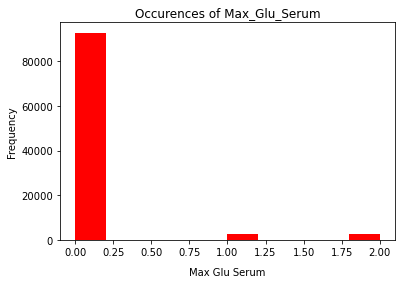

In [50]:
plt.hist(df['max_glu_serum'],color=['red'])
plt.xlabel('Max Glu Serum',labelpad=10)
plt.title('Occurences of Max_Glu_Serum')
plt.ylabel('Frequency')
plt.show()

In [51]:
df['A1Cresult'].unique()

array(['None', '>7', '>8', 'Norm'], dtype=object)

In [52]:
#A1Cresult would be treated the same way as max_glu_serum is treated
a1={'None':0, '>7':1, '>8':1, 'Norm':2}
df['A1Cresult']=df['A1Cresult'].map(a1)

In [53]:
df['metformin'].unique()

array(['No', 'Steady', 'Up', 'Down'], dtype=object)

In [54]:
# These next columns from now on are the drug names given to the patients or these are the levels of the drugs in patient's body
# I would classify 'No' & 'Steady' as same that is I would map them as 0
# While I would be considering 'Up' & 'Down' which means that they are not Normal and I will be classifying them as 1
drug={'No':0, 'Steady':0, 'Up':1, 'Down':1}

In [55]:
df.columns

Index(['cast', 'gender', 'age group', 'admission_typeid',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'Med', 'label'],
      dtype='object')

In [56]:
columns_names=[ 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']
# These are the columns which I would be mapping now

In [57]:
for c in columns_names:
    df[c]=df[c].map(drug)

In [58]:
df.head()

,cast,gender,age group,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,Med,label
1,2,0,1,1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Ch,Yes,>5
2,0,0,2,1,1,7,2,11,5,13,2,0,1,648,250,V27,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,No,Yes,NO
3,2,1,3,1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Ch,Yes,NO
4,2,1,5,1,1,7,1,51,0,8,0,0,0,197,157,250,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Ch,Yes,NO
5,2,1,6,2,1,1,3,31,6,16,0,0,0,414,411,250,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,No,Yes,>5


In [59]:
df.change.unique()

array(['Ch', 'No'], dtype=object)

In [60]:
change = {'No':0,'Ch':1}
df['change']=df['change'].map(change)

In [61]:
df['Med'].unique()

array(['Yes', 'No'], dtype=object)

In [62]:
Med={'No':0,'Yes':1}
df['Med']=df['Med'].map(Med)

In [63]:
df.head()

,cast,gender,age group,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,Med,label
1,2,0,1,1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,>5
2,0,0,2,1,1,7,2,11,5,13,2,0,1,648,250,V27,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NO
3,2,1,3,1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,NO
4,2,1,5,1,1,7,1,51,0,8,0,0,0,197,157,250,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,NO
5,2,1,6,2,1,1,3,31,6,16,0,0,0,414,411,250,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,>5


In [64]:
df['label'].unique()

array(['>5', 'NO', '<30'], dtype=object)

In [65]:
# As we are prediciting that will it happen or not. So, I'll classify label as 0 and 1
label={'>5':1, 'NO':0, '<30':1}
df['label']=df['label'].map(label)

In [66]:
df

,cast,gender,age group,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,Med,label
1,2,0,1,1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1
2,0,0,2,1,1,7,2,11,5,13,2,0,1,648,250,V27,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2,1,3,1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
4,2,1,5,1,1,7,1,51,0,8,0,0,0,197,157,250,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
5,2,1,6,2,1,1,3,31,6,16,0,0,0,414,411,250,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0,1,8,1,2,7,3,51,0,16,0,0,0,250.13,291,458,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1
101762,0,0,9,1,2,4,5,33,3,18,0,0,1,560,276,787,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
101763,2,1,8,1,1,7,1,53,0,9,1,0,0,38,590,296,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
101764,2,0,9,2,2,7,10,45,2,21,0,0,1,996,285,998,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0


Now the Columns which are left behind are diag_1, diag_2, diag_3
 These diag_1,2,3 are basically the diagnosis which are made by the doctors
 These numbers for example 276, V27 etc are the ICD (International Code of Diseases).
 In ICD, there are certain ranges for different diseases. You can visit this link to check ranges : https://icd.codes/icd9cm

In [67]:
df.loc[df['diag_1'].str.contains('V'),['diag_1']]=18
df.loc[df['diag_1'].str.contains('E')==True,['diag_1']]=19
df['diag_1']=df['diag_1'].astype(float)
for index in df.index:
    if df ['diag_1'][index]>=1 and df ['diag_1'][index]<140:
        df ['diag_1'][index]=1
    elif df ['diag_1'][index]>=140 and df ['diag_1'][index]<240:
        df ['diag_1'][index]=2
    elif df ['diag_1'][index]>=240 and df ['diag_1'][index]<280:
        df ['diag_1'][index]=3
    elif df ['diag_1'][index]>=280 and df ['diag_1'][index]<290:
        df ['diag_1'][index]=4
    elif df ['diag_1'][index]>=290 and df ['diag_1'][index]<320:
        df ['diag_1'][index]=5
    elif df ['diag_1'][index]>=320 and df ['diag_1'][index]<390:
        df ['diag_1'][index]=6
    elif df ['diag_1'][index]>=390 and df ['diag_1'][index]<460:
        df ['diag_1'][index]=7
    elif df ['diag_1'][index]>=460 and df ['diag_1'][index]<520:
        df ['diag_1'][index]=8
    elif df ['diag_1'][index]>=520 and df ['diag_1'][index]<580:
        df ['diag_1'][index]=9
    elif df ['diag_1'][index]>=580 and df ['diag_1'][index]<630:
        df ['diag_1'][index]=10
    elif df ['diag_1'][index]>=630 and df ['diag_1'][index]<680:
        df ['diag_1'][index]=11
    elif df ['diag_1'][index]>=680 and df ['diag_1'][index]<710:
        df ['diag_1'][index]=12
    elif df ['diag_1'][index]>=710 and df ['diag_1'][index]<740:
        df ['diag_1'][index]=13
    elif df ['diag_1'][index]>=740 and df ['diag_1'][index]<760:
        df ['diag_1'][index]=14
    elif df ['diag_1'][index]>=760 and df ['diag_1'][index]<780:
        df ['diag_1'][index]=15
    elif df ['diag_1'][index]>=780 and df ['diag_1'][index]<800:
        df ['diag_1'][index]=16
    elif df ['diag_1'][index]>=800 and df ['diag_1'][index]<1000:
        df ['diag_1'][index]=17


<ipython-input-67-75f3946dd381>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df ['diag_1'][index]=3
<ipython-input-67-75f3946dd381>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df ['diag_1'][index]=11
<ipython-input-67-75f3946dd381>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df ['diag_1'][index]=1
<ipython-input-67-75f3946dd381>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [68]:
df.loc[df['diag_2'].str.contains('V')==True,['diag_2']]=18

df.loc[df['diag_2'].str.contains('E')==True,['diag_2']]=19

df['diag_2']=df['diag_2'].astype(float)

for index in df.index:
    if df ['diag_2'][index]>=1 and df ['diag_2'][index]<140:
        df ['diag_2'][index]=1
    elif df ['diag_2'][index]>=140 and df ['diag_2'][index]<240:
        df ['diag_2'][index]=2
    elif df ['diag_2'][index]>=240 and df ['diag_2'][index]<280:
        df ['diag_2'][index]=3
    elif df ['diag_2'][index]>=280 and df ['diag_2'][index]<290:
        df ['diag_2'][index]=4
    elif df ['diag_2'][index]>=290 and df ['diag_2'][index]<320:
        df ['diag_2'][index]=5
    elif df ['diag_2'][index]>=320 and df ['diag_2'][index]<390:
        df ['diag_2'][index]=6
    elif df ['diag_2'][index]>=390 and df ['diag_2'][index]<460:
        df ['diag_2'][index]=7
    elif df ['diag_2'][index]>=460 and df ['diag_2'][index]<520:
        df ['diag_2'][index]=8
    elif df ['diag_2'][index]>=520 and df ['diag_2'][index]<580:
        df ['diag_2'][index]=9
    elif df ['diag_2'][index]>=580 and df ['diag_2'][index]<630:
        df ['diag_2'][index]=10
    elif df ['diag_2'][index]>=630 and df ['diag_2'][index]<680:
        df ['diag_2'][index]=11
    elif df ['diag_2'][index]>=680 and df ['diag_2'][index]<710:
        df ['diag_2'][index]=12
    elif df ['diag_2'][index]>=710 and df ['diag_2'][index]<740:
        df ['diag_2'][index]=13
    elif df ['diag_2'][index]>=740 and df ['diag_2'][index]<760:
        df ['diag_2'][index]=14
    elif df ['diag_2'][index]>=760 and df ['diag_2'][index]<780:
        df ['diag_2'][index]=15
    elif df ['diag_2'][index]>=780 and df ['diag_2'][index]<800:
        df ['diag_2'][index]=16
    elif df ['diag_2'][index]>=800 and df ['diag_2'][index]<1000:
        df ['diag_2'][index]=17


<ipython-input-68-3e36e4d7744d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df ['diag_2'][index]=3
<ipython-input-68-3e36e4d7744d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df ['diag_2'][index]=2
<ipython-input-68-3e36e4d7744d>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df ['diag_2'][index]=7
<ipython-input-68-3e36e4d7744d>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [69]:
df.loc[df['diag_3'].str.contains('V')==True,['diag_3']]=18
df.loc[df['diag_3'].str.contains('E')==True,['diag_3']]=19
df['diag_3']=df['diag_3'].astype(float)
for index in df.index:
    if df ['diag_3'][index]>=1 and df ['diag_3'][index]<140:
        df ['diag_3'][index]=1
    elif df ['diag_3'][index]>=140 and df ['diag_3'][index]<240:
        df ['diag_3'][index]=2
    elif df ['diag_3'][index]>=240 and df ['diag_3'][index]<280:
        df ['diag_3'][index]=3
    elif df ['diag_3'][index]>=280 and df ['diag_3'][index]<290:
        df ['diag_3'][index]=4
    elif df ['diag_3'][index]>=290 and df ['diag_3'][index]<320:
        df ['diag_3'][index]=5
    elif df ['diag_3'][index]>=320 and df ['diag_3'][index]<390:
        df ['diag_3'][index]=6
    elif df ['diag_3'][index]>=390 and df ['diag_3'][index]<460:
        df ['diag_3'][index]=7
    elif df ['diag_3'][index]>=460 and df ['diag_3'][index]<520:
        df ['diag_3'][index]=8
    elif df ['diag_3'][index]>=520 and df ['diag_3'][index]<580:
        df ['diag_3'][index]=9
    elif df ['diag_3'][index]>=580 and df ['diag_3'][index]<630:
        df ['diag_3'][index]=10
    elif df ['diag_3'][index]>=630 and df ['diag_3'][index]<680:
        df ['diag_3'][index]=11
    elif df ['diag_3'][index]>=680 and df ['diag_3'][index]<710:
        df ['diag_3'][index]=12
    elif df ['diag_3'][index]>=710 and df ['diag_3'][index]<740:
        df ['diag_3'][index]=13
    elif df ['diag_3'][index]>=740 and df ['diag_3'][index]<760:
        df ['diag_3'][index]=14
    elif df ['diag_3'][index]>=760 and df ['diag_3'][index]<780:
        df ['diag_3'][index]=15
    elif df ['diag_3'][index]>=780 and df ['diag_3'][index]<800:
        df ['diag_3'][index]=16
    elif df ['diag_3'][index]>=800 and df ['diag_3'][index]<1000:
        df ['diag_3'][index]=17


<ipython-input-69-62cc4d5b3335>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df ['diag_3'][index]=3
<ipython-input-69-62cc4d5b3335>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df ['diag_3'][index]=1
<ipython-input-69-62cc4d5b3335>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df ['diag_3'][index]=7
<ipython-input-69-62cc4d5b3335>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [70]:
df

,cast,gender,age group,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,Med,label
1,2,0,1,1,1,7,3,59,0,18,0,0,0,3.0,3.0,3.0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1
2,0,0,2,1,1,7,2,11,5,13,2,0,1,11.0,3.0,1.0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2,1,3,1,1,7,2,44,1,16,0,0,0,1.0,3.0,7.0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
4,2,1,5,1,1,7,1,51,0,8,0,0,0,2.0,2.0,3.0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
5,2,1,6,2,1,1,3,31,6,16,0,0,0,7.0,7.0,3.0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0,1,8,1,2,7,3,51,0,16,0,0,0,3.0,5.0,7.0,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1
101762,0,0,9,1,2,4,5,33,3,18,0,0,1,9.0,3.0,16.0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
101763,2,1,8,1,1,7,1,53,0,9,1,0,0,1.0,10.0,5.0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
101764,2,0,9,2,2,7,10,45,2,21,0,0,1,17.0,4.0,17.0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0


In [71]:
df.describe()

,cast,gender,age group,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,Med,label
count,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.0,98052.000000,98052.000000,98052.0,98052.000000,98052.000000,98052.000000,98052.000000,98052.0,98052.000000,98052.0,98052.0,98052.000000,98052.000000,98052.0,98052.0,98052.0,98052.0,98052.000000,98052.000000,98052.000000
mean,1.658987,0.461174,7.069351,2.025803,2.324868,4.819789,4.422011,43.148462,1.350712,16.119590,0.376382,0.202464,0.646871,8.295150,7.024548,6.473228,7.512096,0.080406,0.214651,0.015992,0.001550,0.000347,0.000071,0.005089,0.0,0.013187,0.013554,0.0,0.003488,0.002631,0.000133,0.000061,0.0,0.000010,0.0,0.0,0.231938,0.000092,0.0,0.0,0.0,0.0,0.461775,0.768470,0.466232
std,0.860854,0.498493,1.700489,1.450121,4.160169,2.691021,2.993070,19.711757,1.708475,8.108496,1.283365,0.942897,1.271025,4.364405,3.810979,3.871361,1.832472,0.358505,0.517289,0.125443,0.039342,0.018618,0.008449,0.071157,0.0,0.114075,0.115631,0.0,0.058956,0.051229,0.011514,0.007822,0.0,0.003194,0.0,0.0,0.422072,0.009580,0.0,0.0,0.0,0.0,0.498539,0.421813,0.498861
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,2.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,11.000000,0.000000,0.000000,0.000000,7.000000,3.000000,3.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000
50%,2.000000,0.000000,7.000000,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,7.000000,7.000000,7.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000
75%,2.000000,1.000000,8.000000,3.000000,2.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,10.000000,8.000000,8.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000
max,4.000000,1.000000,10.000000,8.000000,25.000000,11.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,17.000000,17.000000,17.000000,16.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000


In [72]:
df.drop(['acetohexamide','tolbutamide','troglitazone','examide','citoglipton','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone'],axis=1,inplace=True)

In [73]:
df[df.duplicated()]

,cast,gender,age group,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,miglitol,tolazamide,insulin,change,Med,label
21179,2,0,3,3,1,1,3,22,1,15,0,0,0,11.0,3.0,11.0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [74]:
df.drop_duplicates(inplace=True)

## Matplotlib

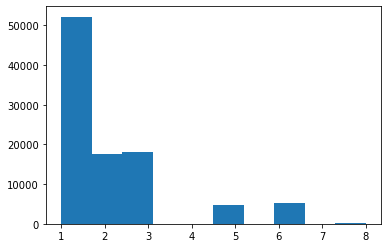

In [75]:
plt.hist(df['admission_typeid'])
plt.show()

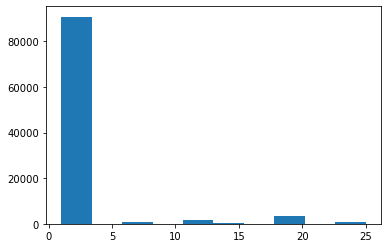

In [76]:
plt.hist(df['discharge_disposition_id'])
plt.show()

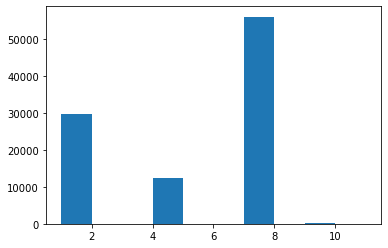

In [77]:
plt.hist(df['admission_source_id'])
plt.show()

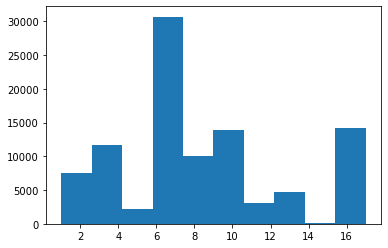

In [78]:
plt.hist(df['diag_1'])
plt.show()

# Training & Testing 

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X = df.drop('label',axis=1)

In [81]:
y=df['label']

In [82]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=30)

In [83]:
print('Shape of X_train : ',X_train.shape)
print('Shape of y_train : ',y_train.shape)

Shape of X_train :  (78440, 34)
Shape of y_train :  (78440,)


In [84]:
print('Shape of X_test : ',X_test.shape)
print('Shape of y_test : ',y_test.shape)

Shape of X_test :  (19611, 34)
Shape of y_test :  (19611,)


Using StandardScaler()

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
sc=StandardScaler()
sc.fit(X_train)
X_train_sc=sc.transform(X_train)
X_test_sc=sc.transform(X_test)

## PCA

In [87]:
df

,cast,gender,age group,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,miglitol,tolazamide,insulin,change,Med,label
1,2,0,1,1,1,7,3,59,0,18,0,0,0,3.0,3.0,3.0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
2,0,0,2,1,1,7,2,11,5,13,2,0,1,11.0,3.0,1.0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2,1,3,1,1,7,2,44,1,16,0,0,0,1.0,3.0,7.0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
4,2,1,5,1,1,7,1,51,0,8,0,0,0,2.0,2.0,3.0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
5,2,1,6,2,1,1,3,31,6,16,0,0,0,7.0,7.0,3.0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0,1,8,1,2,7,3,51,0,16,0,0,0,3.0,5.0,7.0,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
101762,0,0,9,1,2,4,5,33,3,18,0,0,1,9.0,3.0,16.0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
101763,2,1,8,1,1,7,1,53,0,9,1,0,0,1.0,10.0,5.0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
101764,2,0,9,2,2,7,10,45,2,21,0,0,1,17.0,4.0,17.0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0


In [88]:
from sklearn.decomposition import PCA

pca=PCA(n_components=34)
X_trainn=pca.fit_transform(X_train_sc)
X_testt=pca.transform(X_test_sc)

Max When PCA = 34

# Decision Tree Classifier:

In [89]:
from sklearn import tree
clf1=tree.DecisionTreeClassifier()

In [90]:
clf1=clf1.fit(X_train_sc,y_train)
pred1= clf1.predict(X_test_sc)
print(pred1)
clf1.score(X_test_sc,y_test)*100

[0 0 0 ... 0 0 0]


55.82071286522869

In [91]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report 
print ("Accuracy : " , accuracy_score(y_test,pred1)*100)  
print("Report : \n", classification_report(y_test, pred1))
print("F1 Score : ",f1_score(y_test, pred1, average='macro')*100)

Accuracy :  55.82071286522869
Report : 
               precision    recall  f1-score   support

           0       0.59      0.58      0.58     10450
           1       0.53      0.53      0.53      9161

    accuracy                           0.56     19611
   macro avg       0.56      0.56      0.56     19611
weighted avg       0.56      0.56      0.56     19611

F1 Score :  55.66586485347713


# RandomForest Classifier:

In [92]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier()
clf2.fit(X_train_sc, y_train)

RandomForestClassifier()

In [93]:
clf2=clf2.fit(X_train_sc,y_train)
pred2 = clf2.predict(X_test_sc)
print(pred2)
clf2.score(X_test_sc,y_test)*100

[0 1 0 ... 0 0 1]


62.913670898985266

In [94]:
print ("Accuracy : " , accuracy_score(y_test,pred2)*100)  
print("Report : \n", classification_report(y_test, pred2))
print("F1 Score : ",f1_score(y_test, pred2, average='macro')*100)

Accuracy :  62.913670898985266
Report : 
               precision    recall  f1-score   support

           0       0.63      0.72      0.67     10450
           1       0.62      0.53      0.57      9161

    accuracy                           0.63     19611
   macro avg       0.63      0.62      0.62     19611
weighted avg       0.63      0.63      0.63     19611

F1 Score :  62.21857923633331


# AdaBoost Classifier:

In [95]:
from sklearn.ensemble import AdaBoostClassifier

In [96]:
clf3=AdaBoostClassifier()
clf3.fit(X_train_sc,y_train)
pred3=clf3.predict(X_test_sc)
clf3.score(X_test_sc,y_test)*100

63.22472081994799

In [97]:
print ("Accuracy : " , accuracy_score(y_test,pred3)*100)  
print("Report : \n", classification_report(y_test, pred3))
print("F1 Score : ",f1_score(y_test, pred3, average='macro')*100)

Accuracy :  63.22472081994799
Report : 
               precision    recall  f1-score   support

           0       0.63      0.77      0.69     10450
           1       0.64      0.48      0.55      9161

    accuracy                           0.63     19611
   macro avg       0.63      0.62      0.62     19611
weighted avg       0.63      0.63      0.62     19611

F1 Score :  61.911819436947454


## Max Accuracy(AdaBoost): 63.22
## Min Accuracy (Decision Tree): 55.82

# Majority Voting Classifier:

In [98]:
from sklearn.ensemble import VotingClassifier

In [99]:
eclf1 = VotingClassifier(estimators=[('dt', clf1), ('rf', clf2), ('ab', clf3)], voting='hard')
eclf1 = eclf1.fit(X_train_sc, y_train)
pred4=eclf1.predict(X_test_sc)

In [100]:
eclf1.score(X_test_sc,y_test)

0.6326041507317322

In [101]:
print ("Accuracy : " , accuracy_score(y_test,pred4)*100)  
print("Report : \n", classification_report(y_test, pred4))
print("F1 Score : ",f1_score(y_test, pred4, average='macro')*100)

Accuracy :  63.26041507317321
Report : 
               precision    recall  f1-score   support

           0       0.63      0.74      0.68     10450
           1       0.63      0.51      0.56      9161

    accuracy                           0.63     19611
   macro avg       0.63      0.62      0.62     19611
weighted avg       0.63      0.63      0.63     19611

F1 Score :  62.33127130848813
